<a href="https://colab.research.google.com/github/yoly2020/ocr_test_project/blob/main/OCR3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install pytesseract
# !pip install tesseract
# !pip install tesseract-ocr
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 21 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 0s (30.2 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
from pytesseract import Output
import pytesseract
import argparse
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
# print("Tesseract version: ", tesseract.__version__) # 只能命令行获取么
print("OpenCV version: ", cv2.__version__)


OpenCV version:  4.1.2


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import os
os.chdir('/content/gdrive/My Drive/OCR Project/Tesseract Project/data')
!ls

capcom.png  delifrance.JPG  oolongtea.JPG


In [ ]:
image=cv2.imread('capcom.png')
gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# cv2_imshow(image)

In [ ]:
# image=cv2.resize(image,(800,600))
# image=cv2.resize(image,(600,800))

In [ ]:
# results = pytesseract.image_to_data(gray_img, output_type=Output.DICT)

In [ ]:
from imutils.object_detection import non_max_suppression
import numpy as np
import pytesseract
import argparse
import cv2

In [ ]:

args = {
    "image": "images/example_01.jpg",
    "east": "frozen_east_text_detection.pb",
    "min_confidence": 0.5,
    "width": 320,
    "height": 320,
    "padding": 0.0
}

In [ ]:
min_confidence=0.5

In [ ]:
def decode_predictions(scores, geometry):
  (nRows,nColumns)=scores.shape[2:4]
  rectangles=[] # bounding box rectangles
  confidences=[]

  for i in range(0,nRows):
    scoresData=scores[0,0,i]
    xData0=geometry[0,0,i]
    xData1=geometry[0,1,i]
    xData2=geometry[0,2,i]
    xData3=geometry[0,3,i]
    anglesData=geometry[0,4,i]

    for j in range(0,nColumns):
      if scoresData[j] < min_confidence:
        continue
      
      (offsetX,offsetY)=(4.0*j,4.0*i)

      angle=anglesData[j]
      cos=np.cos(angle)
      sin=np.sin(angle)

      h=xData0[j]+xData2[j] # height of bounding box
      w=xData1[j]+xData3[j] # width of bounding box

      endX=int(offsetX+cos*xData1[j]+sin*xData2[j]) # end x coordinate of the bounding box
      endY=int(offsetY-sin*xData1[j]+cos*xData2[j]) # end y coordinate of the bounding box
      startX=int(endX-w) # start x coordinate of the bounding box
      startY=int(endY-h) # start y coordinate of the bounding box

      rectangles.append((startX,startY,endX,endY))
      confidences.append(scoresData[j])

  return (rectangles, confidences)

# About the return values
# rectangles: the probability of a given area containing text
# confidences: maps the score to a bounding box location in the input image

   





In [ ]:
origImg=image.copy()
(origH,origW)=image.shape[:2]
(newW,newH)=(320,320)
rW = origW / float(newW) # the ratio in change
rH = origH / float(newH)

In [ ]:
image = cv2.resize(image, (newW, newH))
(H, W) = image.shape[:2]

In [ ]:
layerNames = [
	"feature_fusion/Conv_7/Sigmoid",
	"feature_fusion/concat_3"]

net = cv2.dnn.readNet("../frozen_east_text_detection.pb") # load the pre-trained EAST text detector

In [ ]:
# determine text locations
blob = cv2.dnn.blobFromImage(image, 1.0, (W, H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)

(rectangles, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rectangles), probs=confidences) # NMS effectively takes the most likely text regions, eliminating other overlapping regions

In [ ]:
print(rectangles)
print(np.array(rectangles).shape)
# rectangles?

[(42, 154, 259, 211), (41, 157, 254, 213), (41, 157, 255, 212), (41, 156, 254, 211), (40, 157, 255, 212), (46, 156, 258, 212), (44, 156, 256, 213), (44, 156, 256, 213), (43, 156, 253, 210), (41, 159, 252, 212), (39, 157, 251, 211), (34, 157, 253, 211), (39, 156, 256, 211), (39, 156, 257, 212), (36, 156, 257, 213), (29, 156, 257, 213), (32, 156, 257, 213), (33, 156, 257, 212), (38, 156, 256, 212), (39, 157, 255, 212), (35, 157, 254, 212), (33, 157, 254, 212), (34, 157, 253, 211), (34, 157, 252, 211), (35, 157, 252, 209), (41, 156, 264, 209), (43, 154, 256, 207), (42, 153, 254, 207), (42, 154, 254, 208), (40, 155, 253, 210), (40, 154, 253, 209), (39, 155, 254, 209), (39, 156, 253, 210), (37, 158, 253, 212), (36, 158, 251, 213), (40, 157, 253, 213), (42, 156, 254, 213), (41, 156, 256, 214), (42, 156, 257, 212), (42, 155, 256, 210), (41, 154, 260, 210), (42, 155, 258, 210), (39, 154, 257, 210), (41, 155, 254, 210), (39, 156, 255, 212), (42, 157, 255, 213), (40, 158, 253, 212), (40, 158, 25

In [ ]:
print(confidences)
print(np.array(confidences).shape)
# confidences?

[0.6334333, 0.8412751, 0.9652983, 0.9558166, 0.88147926, 0.9224765, 0.9677454, 0.6381986, 0.99480116, 0.99914825, 0.9992924, 0.9993229, 0.99924636, 0.9993068, 0.99899536, 0.9931852, 0.9975746, 0.9992563, 0.99948186, 0.999653, 0.9997155, 0.99973434, 0.99972886, 0.99971133, 0.95696896, 0.994825, 0.99953115, 0.9996799, 0.9996773, 0.9997451, 0.99975425, 0.99978286, 0.99979335, 0.99978775, 0.9997739, 0.99976724, 0.99975806, 0.999764, 0.9997714, 0.9997634, 0.99977475, 0.9997725, 0.999816, 0.99981564, 0.9997907, 0.99978346, 0.99979705, 0.99980646, 0.9997917, 0.99978393, 0.9998109, 0.99979764, 0.9997856, 0.9998171, 0.9998381, 0.99984336, 0.9998373, 0.9998404, 0.9998611, 0.99985445, 0.99983716, 0.99981636, 0.99983275, 0.9998647, 0.99990046, 0.99991155, 0.9999176, 0.99991477, 0.999905, 0.99955934, 0.99464464, 0.9997936, 0.9998747, 0.9998784, 0.9998877, 0.9998864, 0.99990284, 0.99991095, 0.99990654, 0.9999027, 0.99989605, 0.99988544, 0.99989986, 0.9998946, 0.9998933, 0.99989676, 0.99989367, 0.999

In [ ]:
results=[]

for (startX,startY,endX,endY) in boxes:
  startX=int(startX*rW)
  startY=int(startY*rH)
  endX=int(endX*rW)
  endY=int(endY*rH)

  dX=int((endX - startX)*args["padding"]) # pad the bounding box
  dY=int((endY - startY)*args["padding"])

  startX=max(0,startX-dX)
  startY=max(0,startY-dY)
  endX=min(origW,endX+dX*2)
  endY=min(origH,endY+dY*2)

  roi=origImg[startY:endY, startX:endX] # extract the padded ROI

  #set Tesseract config parameters
  # -l(a language): English language
  # --oem: use LSTM neural network model for OCR
  # --psm: treating roi as a single-line of text
  config=("-l eng --oem 1 --psm 7") 

  text = pytesseract.image_to_string(roi, config=config) # use Tesseract v4 to recognize a text ROI in an image
  results.append(((startX, startY, endX, endY), text)) # add bounding box coordinates and OCR text string


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

CAPCOM




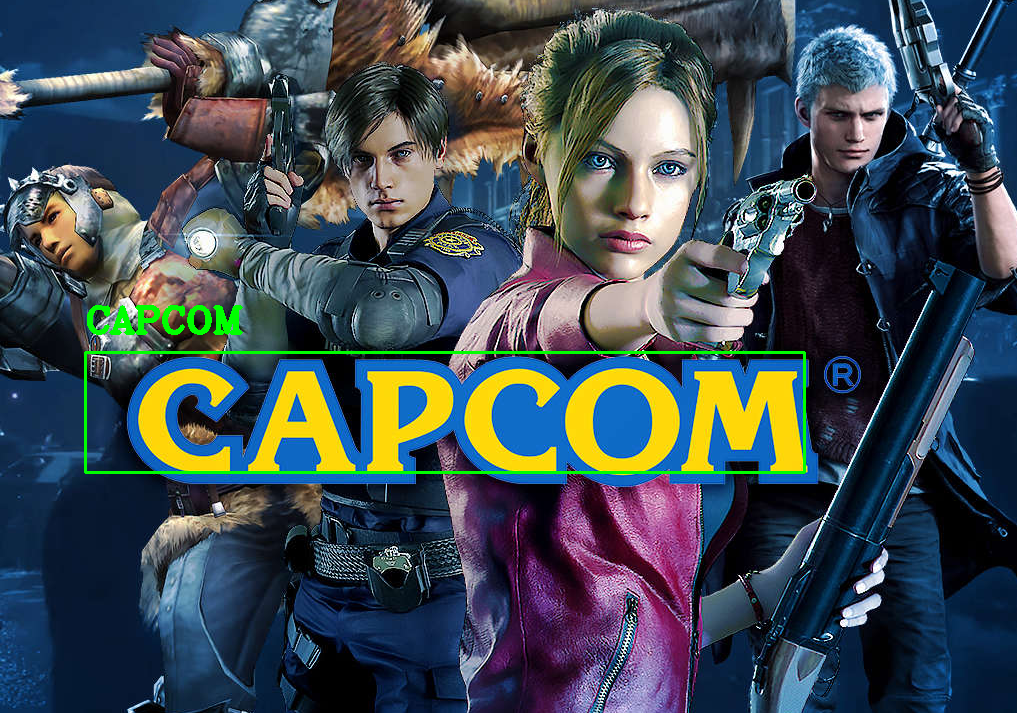

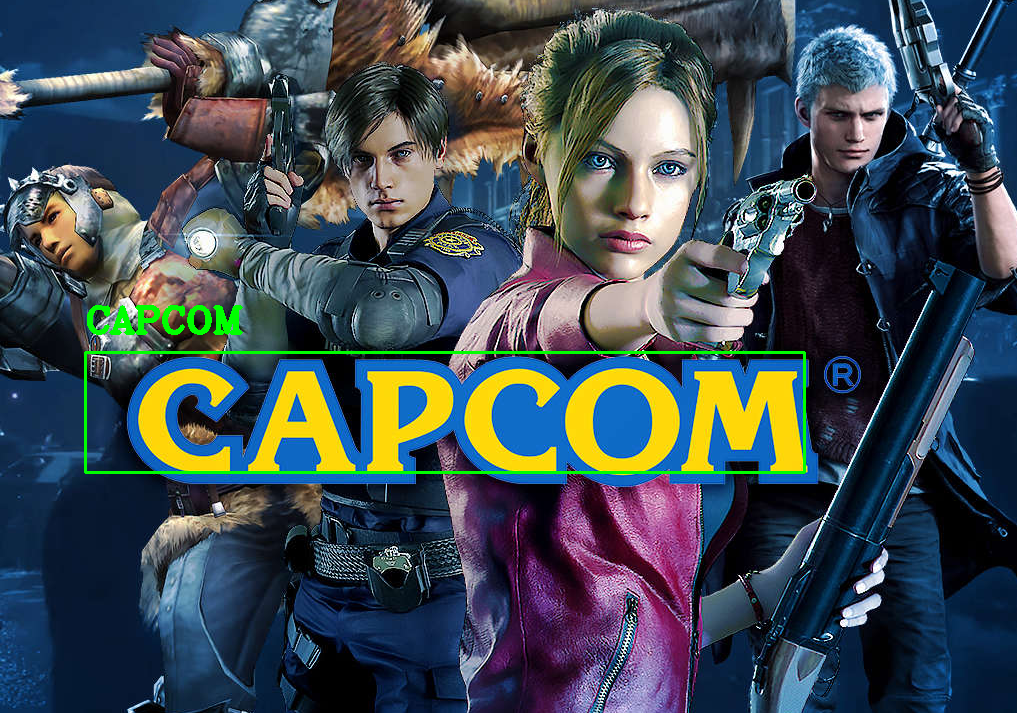

In [ ]:
results=sorted(results,key=lambda r: r[0][1]) # sort from top to bottom
# outputImg=origImg.copy()
final_outputImg=origImg.copy()

for ((startX,startY,endX,endY),text) in results:
  print("{}\n".format(text))

  # strip out non-asii text in order to draw text on the image
  text="".join(ch if ord(ch)<128 else "" for ch in text).strip()
  
  outputImg=origImg.copy()

  cv2.rectangle(outputImg,(startX,startY),(endX,endY),(0,255,0),2)
  cv2.putText(outputImg,text,(startX,startY-20),cv2.FONT_HERSHEY_COMPLEX,1.2,(0,255,0),3)

  cv2.rectangle(final_outputImg,(startX,startY),(endX,endY),(0,255,0),2)
  cv2.putText(final_outputImg,text,(startX,startY-20),cv2.FONT_HERSHEY_COMPLEX,1.2,(0,255,0),3)

  cv2_imshow(outputImg)
  # plt.axis('on')
  # plt.imshow(outputImg)
  # plt.show()
  # cv2.waitKey(0)

print("\n")
cv2_imshow(final_outputImg)
# plt.axis('on')
# plt.imshow(final_outputImg)
# plt.show()